In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from Ge_calculation import GAP, MD_run
import matplotlib.pyplot as plt
from ase.io.cfg import read_cfg
from ase.io.extxyz import write_extxyz
from ase.neighborlist import neighbor_list
import numpy as np
import re
from sys import argv
import os
from ase import build, Atoms
from quippy.potential import Potential
from Ge_analysis import *
from ase.io.proteindatabank import read_proteindatabank, write_proteindatabank
from ase.io.lammpsdata import write_lammps_data
from ase.neighborlist import neighbor_list
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
from glob import glob
import sys

In [3]:
exp_Sq = np.genfromtxt('/Users/Moji/Documents/paper_data/Ge_Sq_exp.txt', delimiter=', ', skip_header=1)
exp_Gr = np.genfromtxt('/Users/Moji/Documents/paper_data/Ge_Gr_exp.txt', delimiter=', ', skip_header=1)
exp_Sq_amo_n = np.genfromtxt('/Users/Moji/Documents/paper_data/Ge_Sq_exp_n_amo.txt', delimiter=', ', skip_header=1)

In [4]:
os.chdir('/Users/Moji/Documents/Summer20/Ge/Analysis/J04')
os.getcwd()
J04_dir = '/Users/Moji/Documents/Summer20/Ge/MD_runs/J04_parameter_explore/'

In [5]:
MDs = [MD_run(i + '/run_64001', label=i) for i in glob(J04_dir + 'as*')]

In [6]:
[i.label.split('/')[-1] for i in MDs]

['as5_ds01_vF',
 'as75_ds002_vT',
 'as5_ds01_vT',
 'as75_ds002_vF',
 'as5_ds01_vT_1000atom',
 'as5_ds01_vF_1000atom',
 'as5_ds01_vT_3b',
 'as5_ds002_vF',
 'as5_ds002_vT',
 'as75_ds01_vT',
 'as75_ds01_vF',
 'as5_ds002_vF_1000atom']

In [22]:
temp = MDs[5].structure_factors(rings_dir=MDs[5].label.split('/')[-1], selection=[i for i in range(70,120)], read_only=True)
temp = MDs[4].structure_factors(rings_dir=MDs[4].label.split('/')[-1], selection=[i for i in range(165,170)], read_only=True)
temp = MDs[-1].structure_factors(rings_dir=MDs[-1].label.split('/')[-1], selection=[i for i in range(32,92)], read_only=False)
temp = MDs[6].structure_factors(rings_dir=i.label.split('/')[-1], selection=[153, 154, 156, 157], read_only=False)

R.I.N.G.S ran successfully


NameError: name 'i' is not defined

In [32]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


In [366]:
def fourier(x, tau, k, theta, *a):
    ret = 0
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos(2 * deg * np.pi / tau * x + theta)
    ret *= np.exp(-k * x)
    ret += 1
    return ret

In [25]:
def bin_fit(x, y, nbins=100):
    bins = np.linspace(np.amin(x), np.amax(x), nbins)
    dig = np.digitize(x, bins)
    bin_means = np.array([[x[dig == i].mean() for i in range(1, len(bins))],
                         [y[dig == i].mean() for i in range(1, len(bins))]])
    bin_std = np.array([[x[dig==i].std() for i in range(1, len(bins))],
                        [y[dig == i].std() for i in range(1, len(bins))]])
    return bin_means, bin_std

bdat, bstd = bin_fit(*tot, nbins=200)

NameError: name 'tot' is not defined

In [ ]:
kde = gaussian_kde(tot, bw_method='silverman')
xgrid = np.linspace(0,12,40)
ygrid = np.linspace(-0.5,5,40)
X,Y = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([X.ravel(),Y.ravel()]))
plt.imshow(Z.reshape(X.shape), origin='lower', aspect='auto',
           extent=[0, 12, -0.5, 5], cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

[(0.0, 4.0), (1.0, 10.0)]

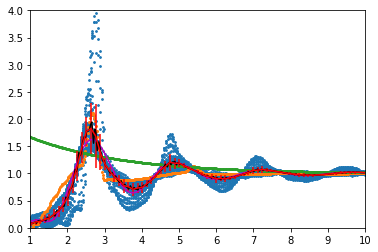

In [450]:
fig, axs = plt.subplots()
axs.scatter(tot[0], tot[1], s=3)
axs.plot(x := np.linspace(0,10,500), np.polynomial.polynomial.polyval(x, popt), color='m')
axs.plot(Sq_1000atom2[0], Sq_1000atom2[1], color='k')
axs.scatter(x, fourier(x, *popt2), s=4)
axs.scatter(t := np.linspace(0,10,500), np.exp(-0.4*t) + 1, s=3)
axs.errorbar(bdat[0], bdat[1], yerr=bstd[1], color='r')
#axs.scatter(t, np.cos(3*t))
#axs.plot(x, fourier(x, 3, 1, 0))
axs.set(xlim=(1,10), ylim=(0,4))

In [23]:
MDs[5].bin_fit_g(nbins=100, s_selection=range(0,len(MDs[5].Sq_x)-5), r_selection=[2,10])
MDs[4].bin_fit_g(nbins=100, s_selection=range(0,len(MDs[4].Sq_x)-5), r_selection=[2,10])
MDs[11].bin_fit_g(nbins=100, s_selection=range(0,len(MDs[4].Sq_x)-5), r_selection=[2,10])

for i in range(len(MDs)):
    if i not in (4,5,11):
        print(i)
        MDs[i].bin_fit_g(nbins=50, r_selection=[2,8])

0


AttributeError: 'MD_run' object has no attribute 'gr'

NameError: name 'bin_fit' is not defined

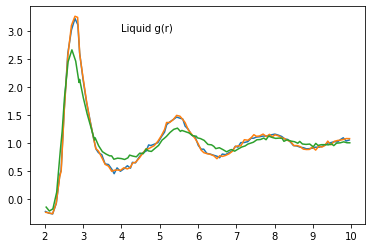

In [24]:
fig, axs = plt.subplots()
axs.text(4,3,'Liquid g(r)')
# axs.errorbar(*MDs[5].gr_av, yerr=MDs[5].gr_std[1], label=MDs[5].label.split('/')[-1])
axs.errorbar(*MDs[5].gr_av, yerr=None, label=MDs[5].label.split('/')[-1])
axs.errorbar(*MDs[4].gr_av, yerr=None, label=MDs[4].label.split('/')[-1])
axs.errorbar(*MDs[11].gr_av, yerr=None, label=MDs[11].label.split('/')[-1])
axs.plot(*bin_fit(exp_Gr.T[0], exp_Gr.T[1], nbins=200)[0],
         label='Exp. (1253K)', color='Gray', linewidth=3, zorder=1)
# axs.plot(x := np.linspace(0,10,500), np.polynomial.polynomial.polyval(x, popt), color='m')
# axs.plot(Sq_1000atom2[0], Sq_1000atom2[1], color='k')
# axs.scatter(x, fourier(x, *popt2), s=4)
# axs.scatter(t := np.linspace(0,10,500), np.exp(-0.4*t) + 1, s=3)
#axs.scatter(t, np.cos(3*t))
#axs.plot(x, fourier(x, 3, 1, 0))
axs.legend()
axs.set(xlim=(1.5,10), ylim=(-.5,4.5), xlabel='r', ylabel='g(r)')
fig.savefig('gr_error.png')

In [26]:
os.chdir('/Users/Moji/Documents/Summer20/Ge/Analysis/J04')
for i in MDs:
    if ('vT' in i.label or 'vF' in i.label) and '1000' not in i.label:
        tmp = i.structure_factors(rings_dir=i.label.split('/')[-1], selection=[153, 154, 156, 157], read_only=True)

In [29]:
MDs[5].bin_fit(nbins=200, s_selection=range(0,len(MDs[5].Sq_x)-5), q_selection=[1,12])
MDs[4].bin_fit(nbins=200, s_selection=range(0,len(MDs[4].Sq_x)-5), q_selection=[1,12])
MDs[11].bin_fit(nbins=200, s_selection=range(0,len(MDs[4].Sq_x)-5), q_selection=[1,12])
# MDs[5].bin_fit(nbins=199, s_se
# lection=[-1,-2,-3,-4,-5], q_selection=(1,12))
# MDs[4].bin_fit(nbins=199, s_selection=[-1,-2,-3,-4,-5], q_selection=(1,12))
for i in range(len(MDs)):
    if i not in (4,5, 11):
        MDs[i].bin_fit(nbins=100, q_selection=[1,12])

ValueError: need at least one array to concatenate

In [30]:
exp_Sq_bin = bin_fit(exp_Sq.T[0], exp_Sq.T[1], nbins=200)

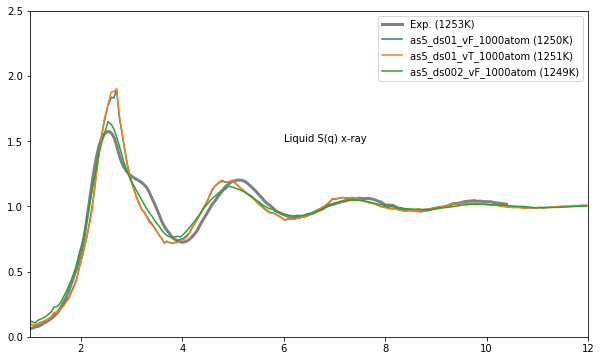

In [31]:
fig, axs = plt.subplots(figsize=(10,6))
axs.text(6,1.5,'Liquid S(q) x-ray')
axs.plot(*bin_fit(exp_Sq.T[0], exp_Sq.T[1], nbins=200)[0],
         label='Exp. (1253K)', color='Gray', linewidth=3)
for i, val in enumerate([MDs[5], MDs[4], MDs[11]]):
    # axs.errorbar(*val.Sq_x_av, yerr=val.Sq_x_std[1], label='{} ({}K)'.format(val.label.split('/')[-1],
    #                                                          int(np.around(val.Sq_av_T, decimals=0))))
    axs.errorbar(*val.Sq_x_av, yerr=None, label='{} ({}K)'.format(val.label.split('/')[-1],
                                                             int(np.around(val.Sq_av_T, decimals=0))))
    #axs.scatter(*(np.concatenate([i for i in val.Sq_x], axis=1)))
#axs.errorbar(*bdat, yerr=None, color='m', label='{} ({}K)'.format(MDs[4].label.split('/')[-1],
 #                                                                   int(np.around(np.average(MDs[4].dat[3][80:120]), decimals=0))))
#axs.plot(Sq_1000atom2[0], Sq_1000atom2[1], color='c', label='{} ({}K)'.format(MDs[4].label.split('/')[-1],
#                                                                         int(np.around(np.average(MDs[4].dat[3][80:120]), decimals=0))))
#axs.plot(x, np.polynomial.polynomial.polyval(x, popt), color='k', linewidth=4.0)
axs.set(xlim=(1,12), ylim=(0,2.5))
axs.legend(markerscale=2)
fig.savefig('Sq_xray.png', bbox_inches='tight')

In [715]:
fig, axs = plt.subplots(figsize=(10,6))
axs.text(6,1.5,'Amorphous S(q) neutron')
axs.plot(*bin_fit(exp_Sq_amo_n.T[0], exp_Sq_amo_n.T[1], nbins=200)[0],
         label='Exp. (1253K)', color='Gray', linewidth=3)
for i, val in enumerate([MDs[5], MDs[4], MDs[1]]):
    # axs.errorbar(*val.Sq_n_av, yerr=val.Sq_n_std[1], label='{} ({}K)'.format(val.label.split('/')[-1],
    #                                                                          int(np.around(val.Sq_av_T, decimals=0))))
    axs.errorbar(*val.Sq_n_av, yerr=None, label='{} ({}K)'.format(val.label.split('/')[-1],
                                                                             int(np.around(val.Sq_av_T, decimals=0))))
#axs.errorbar(*bdat, yerr=None, color='m', label='{} ({}K)'.format(MDs[4].label.split('/')[-1],
 #                                                                   int(np.around(np.average(MDs[4].dat[3][80:120]), decimals=0))))
#axs.plot(Sq_1000atom2[0], Sq_1000atom2[1], color='c', label='{} ({}K)'.format(MDs[4].label.split('/')[-1],
#                                                                         int(np.around(np.average(MDs[4].dat[3][80:120]), decimals=0))))
#axs.plot(x, np.polynomial.polynomial.polyval(x, popt), color='k', linewidth=4.0)
axs.set(xlim=(1,12), ylim=(0,2))
axs.legend(markerscale=2)
fig.savefig('Sq_amo_neutron.png')

SyntaxError: invalid syntax (<ipython-input-715-ec6b31ce901c>, line 3)

In [717]:
def similarity(a, b, q):
    if len(a) != len(b):
        raise ValueError('Shapes do not match: {}  {}'.format(np.shape(a), np.shape(b)))
    integrand = abs(np.array([a[i] - b[i] for i in range(len(a))]))
    diff_int = np.trapz(integrand, q)
    return (diff_int)


In [718]:
similarity(exp_Sq_bin[1], MDs[4].Sq_x_av[1], MDs[4].Sq_x_av[0])


AttributeError: 'MD_run' object has no attribute 'Sq_x_av'

In [488]:
ref = bin_fit(exp_Sq.T[0][(a := slice(*extract_range(exp_Sq.T[0], (1, 10))))], exp_Sq.T[1][a], nbins=200)
a = [similarity(ref[1], bin_fit(i.Sq_x[-1][0][(a := slice(*extract_range(i.Sq_x[-1][0], (1,10))))], i.Sq_x[-1][1][a], nbins=200)[0]) for i in MDs]
for i in range(len(a)):
    print('{:<40s} {:3.6f}'.format(MDs[i].label.split('/')[-1], a[i][1]))

as5_ds01_vF                              0.523096
as75_ds002_vT                            0.521572
as5_ds01_vT                              0.521512
as75_ds002_vF                            0.521455
as5_ds01_vF_1000atom                     0.530627
as5_ds002_vF                             0.522845
as5_ds002_vT                             0.542979
as75_ds01_vT                             0.523255
as75_ds01_vF                             0.522910


<ipython-input-449-8ba407556e81>:4: RuntimeWarning: Mean of empty slice.
  bin_means = np.array([[x[dig == i].mean() for i in range(1, len(bins))],
<ipython-input-449-8ba407556e81>:5: RuntimeWarning: Mean of empty slice.
  [y[dig == i].mean() for i in range(1, len(bins))]])


IndexError: list index out of range

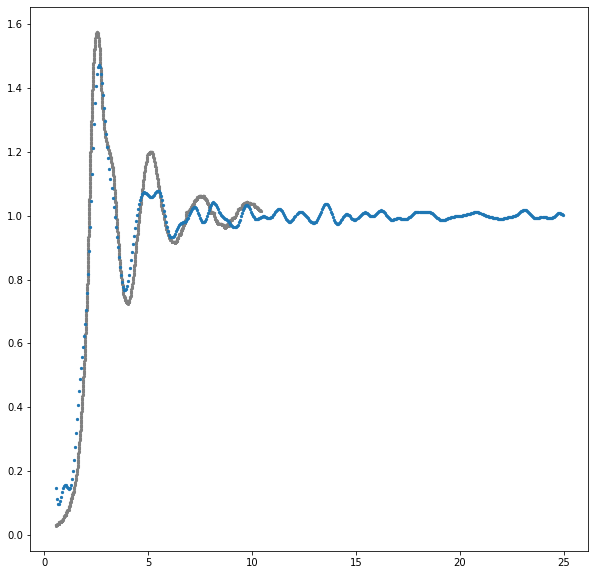

In [42]:
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(exp_Sq.T[0], exp_Sq.T[1], s=6, marker='*', label='Exp. (1253K)', color='Gray')
for i, val in enumerate([MDs[4]]):
    axs.scatter(np.concatenate([val.Sq_x[i] for i in range(len(val.Sq_x))]),
    np.concatenate([val.Sq_x[i][1] for i in range(len(val.Sq_x))]),
    s=5, label='{} ({}K)'.format(val.label.split('/')[-1],
    int(np.around(val.dat[3][155], decimals=0))))
axs.set(xlim=(0,11))
axs.legend(markerscale=2)


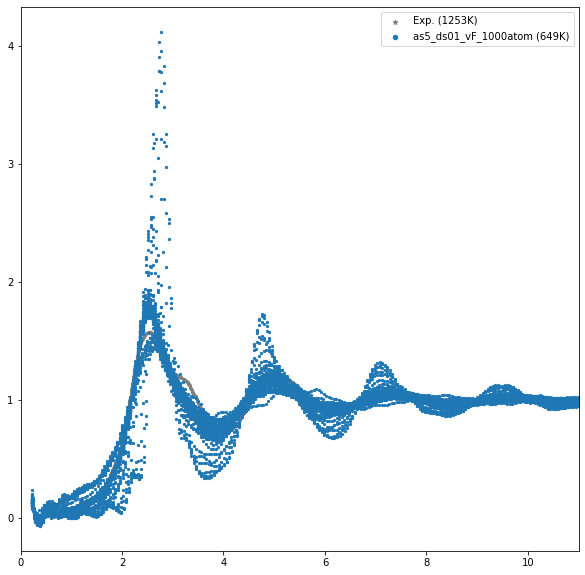

In [40]:
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(exp_Sq.T[0], exp_Sq.T[1], s=6, marker='*', label='Exp. (1253K)', color='Gray')

axs.scatter(Sq_1000atom[0], Sq_1000atom[1],
    s=5, label='{} ({}K)'.format(val.label.split('/')[-1],
    int(np.around(val.dat[3][155], decimals=0))))
axs.set(xlim=(0,11))
axs.legend(markerscale=2)

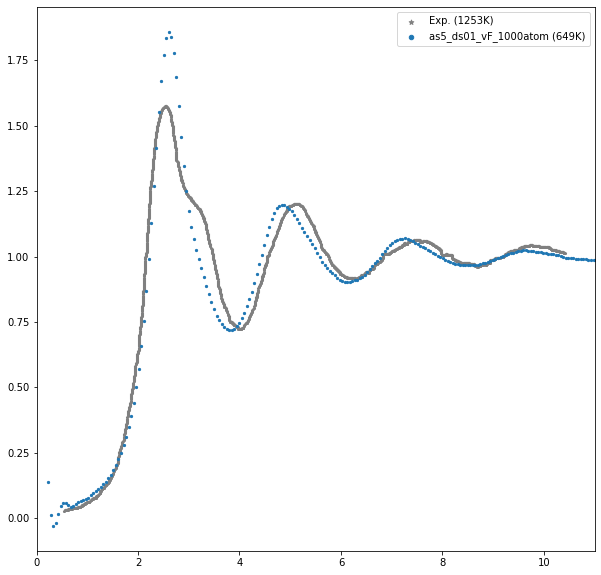

In [41]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate([MDs[0]]):
    axs.scatter(val.gr[1][0], val.gr[1][1], s=4, label='{} ({}K)'.format(val.label.split('/')[-1],
                                                                             int(np.around(val.dat[3][155], decimals=0))))
axs.scatter(exp_Gr.T[0], exp_Gr.T[1], s=4, marker='*', label='Exp. (1253K)')
axs.set(xlim=(0,11))
axs.legend(markerscale=2)

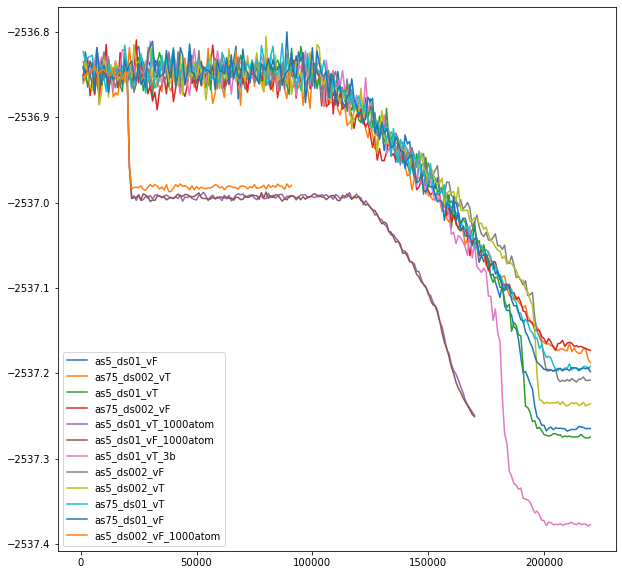

In [711]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(MDs):
    axs.plot(val.dat[0][2:], val.dat[6][2:], label=val.label.split('/')[-1])
#axs.scatter(exp_.T[0], exp_Gr.T[1], s=4, marker='*', label='Exp. 1123K')
# axs.set(xlim=(0,11))
axs.legend(markerscale=2)

In [712]:
MDs[0].dat_head[6]

'f_PEAve_Atom'

In [731]:
exp_Gr.T[0][np.argmax(exp_Gr.T[1])]

2.748008

In [ ]:
2.748


In [733]:
Si_gr_exp = np.genfromtxt('/Users/Moji/Documents/paper_data/Si_gr.txt', delimiter=', ')


In [734]:
Si_gr_exp.T[0][np.argmax(Si_gr_exp.T[1])]


2.434003

In [12]:
np.average(MDs[5].dat[-2][24:123])

21393.603656565658

In [32]:
1000*72.64*1.6605*10**-24/(np.average(MDs[-1].dat[-2][24:92])* 10**-24)

5.564105653679388